In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
df2014 = pd.read_csv('2014_Financial_Data.csv')
df2015 = pd.read_csv('2015_Financial_Data.csv')
df2016 = pd.read_csv('2016_Financial_Data.csv')
df2017 = pd.read_csv('2017_Financial_Data.csv')
df2018 = pd.read_csv('2018_Financial_Data.csv')

In [103]:
df2014 = df2014.rename({'2015 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2015 = df2015.rename({'2016 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2016 = df2016.rename({'2017 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2017 = df2017.rename({'2018 PRICE VAR [%]':'PRICE_VAR'},axis =1)
df2018 = df2018.rename({'2019 PRICE VAR [%]':'PRICE_VAR'},axis =1)

In [104]:
# Adding the Benchmark for each year
df2014['S&P 500'] = -0.0073
df2015['S&P 500'] = 0.0954
df2016['S&P 500'] = 0.1942
df2017['S&P 500'] = -0.0624
df2018['S&P 500'] = 0.2888

In [105]:
print(df2014.shape)
print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)

(3808, 226)
(4120, 226)
(4797, 226)
(4960, 226)
(4392, 226)


In [106]:
df = pd.concat([df2014,df2015,df2016,df2017,df2018])

## Übersicht Datenset

In [107]:
df.head(3)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE_VAR,Class,S&P 500
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,-0.0073
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,-0.0073
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,-0.0073


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 226 entries, Unnamed: 0 to S&P 500
dtypes: float64(223), int64(1), object(2)
memory usage: 38.2+ MB


In [109]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,S&P 500
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,...,19952.000000,19650.000000,19690.000000,19213.000000,19462.000000,19598.000000,19655.000000,2.207700e+04,22077.000000,22077.000000
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,...,10.978239,0.158858,1.134221,0.783208,3.733922,0.295610,0.365149,2.698893e+02,0.550754,0.102176
std,3.197314e+10,312.648170,2.583092e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,...,1101.098165,3.268154,45.381079,66.524006,174.864701,12.974127,15.030054,1.934617e+04,0.497429,0.130118
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-3963.131200,-1.051000,-2.662200,-2.369900,-1.003972e+02,0.000000,-0.062400
25%,5.880737e+07,-0.014700,3.211750e+06,3.035575e+07,0.000000e+00,1.768550e+07,3.564150e+07,-4.433750e+06,0.000000e+00,-8.745000e+06,...,-0.051125,0.000000,-0.031075,-0.103800,-0.067475,0.000000,-0.013700,-1.947409e+01,0.000000,-0.007300
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.009500,0.000000,0.048000,0.032400,0.000000,0.000000,0.061000,3.909087e+00,1.000000,0.095400
75%,2.287259e+09,0.182400,1.180224e+09,8.806035e+08,1.220150e+07,3.699722e+08,6.210870e+08,2.554363e+08,4.969325e+07,1.964680e+08,...,0.200550,0.058400,0.176800,0.142100,0.150075,0.000000,0.185350,2.750567e+01,1.000000,0.194200
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,2042.000000,2.418601e+06,1.000000,0.288800


In [110]:
#Übersicht erhalten über alle Features

for column in df.columns:
    print(column)

Unnamed: 0
Revenue
Revenue Growth
Cost of Revenue
Gross Profit
R&D Expenses
SG&A Expense
Operating Expenses
Operating Income
Interest Expense
Earnings before Tax
Income Tax Expense
Net Income - Non-Controlling int
Net Income - Discontinued ops
Net Income
Preferred Dividends
Net Income Com
EPS
EPS Diluted
Weighted Average Shs Out
Weighted Average Shs Out (Dil)
Dividend per Share
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
EBITDA
EBIT
Consolidated Income
Earnings Before Tax Margin
Net Profit Margin
Cash and cash equivalents
Short-term investments
Cash and short-term investments
Receivables
Inventories
Total current assets
Property, Plant & Equipment Net
Goodwill and Intangible Assets
Long-term investments
Tax assets
Total non-current assets
Total assets
Payables
Short-term debt
Total current liabilities
Long-term debt
Total debt
Deferred revenue
Tax Liabilities
Deposit Liabilities
Total non-current liabilities
Total liabilities
Other comprehensive income
Re

Unabhängig vom Namen des Unternehmens und Jahr der Daten wollen wir eine Prediction erstellen:

In [111]:
df = df.drop(['Unnamed: 0'], axis=1)

In [112]:
df.corr()['PRICE_VAR'].sort_values()

Free Cash Flow Yield             -0.943080
Earnings Yield                   -0.047149
Graham Net-Net                   -0.022868
10Y Revenue Growth (per Share)   -0.019559
Net Cash/Marketcap               -0.017185
                                    ...   
SG&A Expenses Growth              0.032797
cashConversionCycle               0.087703
operatingCycle                    0.161038
PRICE_VAR                         1.000000
operatingProfitMargin                  NaN
Name: PRICE_VAR, Length: 224, dtype: float64

# Wahl unserer Features


Folgende Bilanzkennzahlen nehmen wir für unsere Folgeberechnungen:

* Debt to Equity (oder EK-Quote, diese hat es aber nicht)
* Revenue
* Revenue Growth
* Gross Margin
* R&D Margin = R&D Expenses/Revenue

Cashflowrechnung:
* EBIT
* EBIT Margin

Folgende aufgrund der signifikanten Werte des Carhartt Modells (inkl. Momentum):
* priceToBookRatio
* 5Y Shareholders Equity Growth (per Share)
* Market Cap

Multiples:
* PE ratio
* Enterprise Value over EBITDA
* priceEarningsToGrowthRatio

Kennzahlensysteme:
* ROE

Wir wollen die folgende Response Variabel bestimmen
* PRICE_VAR

Ebenfalls haben wir einen Benchmark, mit den wir unsere Schätzungen vergleichen und somit die Klassifizierung in Buy/Hold/Sell ermöglichen:
* S&P 500

In [113]:
dfn = df[['Debt to Equity', 'Revenue', 'Revenue Growth', 'Gross Margin', 'EBIT', 'EBIT Margin', 'priceToBookRatio', '5Y Shareholders Equity Growth (per Share)', 'Market Cap', 'PE ratio', 'Enterprise Value over EBITDA', 'priceEarningsToGrowthRatio', 'ROE', 'PRICE_VAR', 'S&P 500']]

In [114]:
dfn.head()

,Debt to Equity,Revenue,Revenue Growth,Gross Margin,EBIT,EBIT Margin,priceToBookRatio,5Y Shareholders Equity Growth (per Share),Market Cap,PE ratio,Enterprise Value over EBITDA,priceEarningsToGrowthRatio,ROE,PRICE_VAR,S&P 500
0,0.5061,7.440100e+10,-0.0713,0.4754,1.520300e+10,0.2043,0.0000,0.0353,2.126614e+11,18.7566,12.9411,15.557842,0.1664,-9.323276,-0.0073
1,1.5093,3.734148e+09,1.1737,0.2487,1.875310e+08,0.0502,NaN,NaN,6.253200e+09,81.5526,NaN,2.631793,0.3294,-25.512193,-0.0073
2,2.1007,9.837500e+10,0.0182,0.2057,2.713000e+09,0.0276,7.0982,0.0558,1.827470e+10,12.0340,6.6086,0.000000,0.2821,33.118297,-0.0073
3,-2.7237,2.552641e+10,0.0053,0.2869,6.748090e+08,0.0264,0.0000,0.0000,6.359738e+09,28.6087,11.0987,0.000000,-0.1180,2.752291,-0.0073
4,1.3445,1.790960e+10,0.0076,0.3557,3.010100e+09,0.1681,0.0000,0.0623,3.333006e+10,18.7034,11.4723,15.254287,0.2792,12.897715,-0.0073


In [115]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Debt to Equity                             19763 non-null  float64
 1   Revenue                                    20906 non-null  float64
 2   Revenue Growth                             19989 non-null  float64
 3   Gross Margin                               20878 non-null  float64
 4   EBIT                                       20652 non-null  float64
 5   EBIT Margin                                20403 non-null  float64
 6   priceToBookRatio                           17084 non-null  float64
 7   5Y Shareholders Equity Growth (per Share)  15467 non-null  float64
 8   Market Cap                                 19006 non-null  float64
 9   PE ratio                                   19829 non-null  float64
 10  Enterprise Value over E

In [116]:
dfn.describe()

,Debt to Equity,Revenue,Revenue Growth,Gross Margin,EBIT,EBIT Margin,priceToBookRatio,5Y Shareholders Equity Growth (per Share),Market Cap,PE ratio,Enterprise Value over EBITDA,priceEarningsToGrowthRatio,ROE,PRICE_VAR,S&P 500
count,19763.000000,2.090600e+04,19989.000000,20878.000000,2.065200e+04,20403.000000,1.708400e+04,15467.000000,1.900600e+04,19829.000000,17034.000000,12998.000000,1.973700e+04,2.207700e+04,22077.000000
mean,0.562819,5.161619e+09,3.622214,0.487844,6.161903e+08,-7.258787,2.034479e+04,0.039182,3.056035e+10,37.903693,21.731074,58.407427,1.646107e+03,2.698893e+02,0.102176
std,26.657310,3.197314e+10,312.648170,0.945601,3.324923e+09,217.794982,1.294365e+06,0.203913,1.432506e+12,852.906916,308.201499,954.030699,1.148279e+05,1.934617e+04,0.130118
min,-2586.435900,-6.276160e+08,-12.769300,-74.319100,-1.871300e+10,-24242.000000,0.000000e+00,-0.887400,0.000000e+00,0.000000,0.000000,0.000000,-3.477246e+04,-1.003972e+02,-0.062400
25%,0.008950,5.880737e+07,-0.014700,0.250700,-3.778676e+06,0.000000,6.204750e-01,-0.015500,1.976170e+08,0.000000,2.275950,11.225863,-6.620000e-02,-1.947409e+01,-0.007300
50%,0.434000,4.352510e+08,0.057600,0.460750,3.815450e+07,0.081600,1.759550e+00,0.031500,9.135604e+08,12.951500,9.927850,17.977255,7.120000e-02,3.909087e+00,0.095400
75%,1.077350,2.287259e+09,0.182400,0.802775,2.670475e+08,0.213250,4.303450e+00,0.095700,3.882652e+09,23.425000,15.484825,28.968642,1.460000e-01,2.750567e+01,0.194200
max,2131.512800,1.886894e+12,42138.663900,31.000000,2.339970e+11,1056.465800,1.084587e+08,6.031600,9.619200e+13,105828.712900,35296.196000,100419.288007,1.114114e+07,2.418601e+06,0.288800


# Datenbereinigung

Wir sehen dass unser Datensatz verschiedene Probleme mit sich bringt die wir genauer anschauen müssen. Folgendes ist uns aufgefallen:
1. Dem Datensatz fehlen einige Daten (Je nach Feature sind es mehr oder weniger die uns fehlen)
2. Wir müssen auf Multikollinearität achten damit es keine Verzerrung ergibt bei unseren Prognosen
3. Es gibt starke Ausreisser in unseren Daten und dies in verschiedenen Spalten (bsp. haben wir ein Unternehmen mit Debt to Equity von -2586.4)
4. Wir müssen fehlende Datenpunkte noch ergänzen durch einen Schätzwert

## 1. Wir untersuchen welche Daten uns fehlen:

* 1 Schritt: Spalten werden analysiert
* 2 Schritt: Zeilen werden analysiert

### 1 Schritt: Untersuchen der Spalten

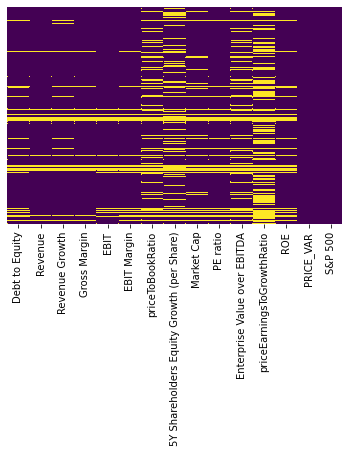

In [117]:
sns.heatmap(dfn.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [118]:
# Unser Threshhold wieviele Werte unsere Features mindestens mitbringen sollten.
# Wir wollen mindestens 70% der Datenpunkte für unsere Features.

Threshhold = 22077*(1-0.7)
print('Unsere Untergrenze liegt bei', round(Threshhold, 0), 'fehlenden Datenpunkten')

Unsere Untergrenze liegt bei 6623.0 fehlenden Datenpunkten


In [119]:
dfn.isna().sum()

Debt to Equity                               2314
Revenue                                      1171
Revenue Growth                               2088
Gross Margin                                 1199
EBIT                                         1425
EBIT Margin                                  1674
priceToBookRatio                             4993
5Y Shareholders Equity Growth (per Share)    6610
Market Cap                                   3071
PE ratio                                     2248
Enterprise Value over EBITDA                 5043
priceEarningsToGrowthRatio                   9079
ROE                                          2340
PRICE_VAR                                       0
S&P 500                                         0
dtype: int64

Wir sehen uns fehlen bei dem Faktor 'priceEarningsToGrowthRatio' insgesamt 9079 Datenpunkte

In [120]:
dfn = dfn.drop(['priceEarningsToGrowthRatio'], axis=1)

### 2 Schritt: Untersuchen der Zeilen

In [121]:
# Ebenfalls sehen wir das es Zeilen gibt in denen sehr viele Features fehlen
# Wir wollen für unsere Zeilen mindestens 50% der Features haben, um eine Schätzung durchzuführen
# Also mindestens 6 von 12 Features
dfn = dfn.dropna(thresh=6+2)
dfn.shape

(19825, 14)

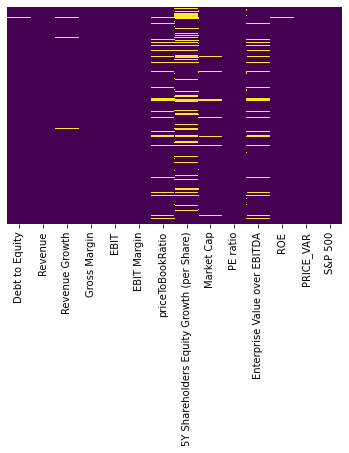

In [122]:
sns.heatmap(dfn.isnull(), yticklabels=False, cbar=False,cmap='viridis')

## 2. Wir untersuchen unseren Datensatz auf Multikollinearität

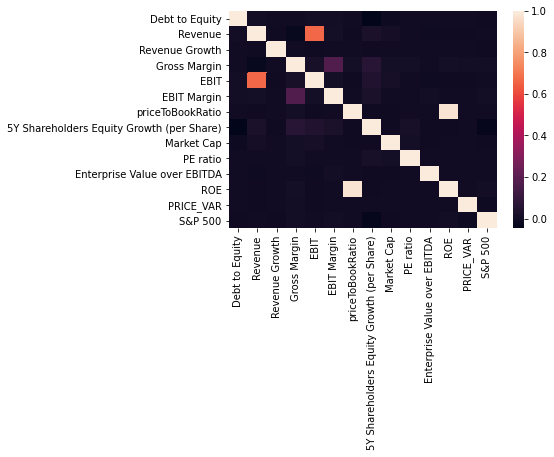

In [123]:
sns.heatmap(dfn.corr(), annot=False)

Wir sehen eine starke Korrelation zwischen ROE und der priceToBookRatio, welches zu Multikollinearität führen könnte. 
Wir entfernen deshalb die Input Variable priceToBookRatio.

In [124]:
dfn = dfn.drop('priceToBookRatio', axis=1)

## 3. Ergänzen der fehlenden Datenpunkte

In [125]:
# Fehlende Datenpunkte ergänzen wir mit dem Median. 
# Dies aufgrund weil wir unseren Datensatz noch nicht für die Ausreisser nach oben bzw nach unten korrigiert haben

In [126]:
dfn = dfn.fillna(value=dfn.median())
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19825 entries, 0 to 4391
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Debt to Equity                             19825 non-null  float64
 1   Revenue                                    19825 non-null  float64
 2   Revenue Growth                             19825 non-null  float64
 3   Gross Margin                               19825 non-null  float64
 4   EBIT                                       19825 non-null  float64
 5   EBIT Margin                                19825 non-null  float64
 6   5Y Shareholders Equity Growth (per Share)  19825 non-null  float64
 7   Market Cap                                 19825 non-null  float64
 8   PE ratio                                   19825 non-null  float64
 9   Enterprise Value over EBITDA               19825 non-null  float64
 10  ROE                    

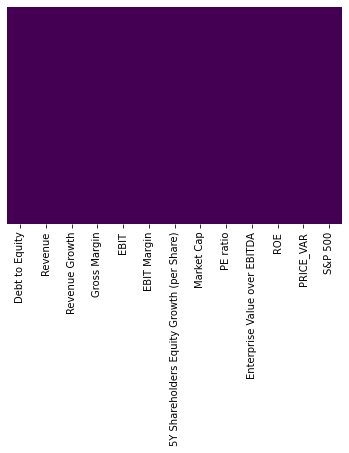

In [127]:
sns.heatmap(dfn.isnull(), yticklabels=False, cbar=False,cmap='viridis')

## 4. Entfernen von Aussreisern

Aussreisser in diesem Datensatz müssen bereinigt werden, da diese sonst unsere Prognosen stark verzerren könnten. Wir führen deshalb folgende Strategie. Datenpunkte in einer Spalte die über bzw unter der dritten Standardabweichung liegen, entfernen wir. Dabei entfernen wir die ganze Zeile in der dieser Fall vorliegt. Dies werden wir mit der Bestimmung des Z Scores durchführen.

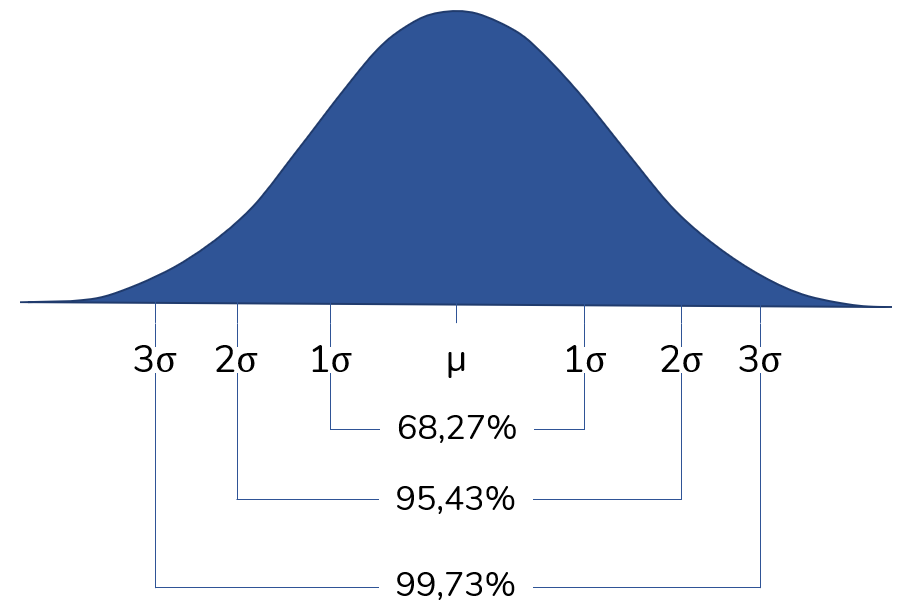

In [144]:
from IPython.display import Image
Image(filename='Normalverteilung.png')

In [145]:
dfn.shape

(19825, 13)

In [161]:
from scipy import stats
dfn = dfn[(np.abs(stats.zscore(dfn)) < 2).all(axis=1)]
dfn

,Debt to Equity,Revenue,Revenue Growth,Gross Margin,EBIT,EBIT Margin,5Y Shareholders Equity Growth (per Share),Market Cap,PE ratio,Enterprise Value over EBITDA,ROE,PRICE_VAR,S&P 500
1,1.5093,3.734148e+09,1.1737,0.2487,1.875310e+08,0.0502,0.0316,6.253200e+09,81.5526,9.92785,0.3294,-25.512193,-0.0073
12,0.7891,1.089253e+10,-0.0745,0.2934,1.933571e+09,0.1775,0.0495,4.241530e+09,24.3280,9.92785,0.1427,-38.548749,-0.0073
14,1.3406,5.727000e+09,0.0214,0.3847,5.273000e+08,0.0921,0.0115,1.032620e+10,27.8029,18.45000,0.2041,18.603845,-0.0073
16,2.4861,8.268000e+09,0.0268,0.3593,1.362000e+09,0.1647,0.1999,1.325661e+10,15.3007,10.22170,0.5362,22.628763,-0.0073
18,0.0693,9.316256e+09,0.0645,0.1680,9.315070e+08,0.1000,0.1157,1.383937e+10,23.0395,12.95760,0.1671,58.666783,-0.0073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,0.1960,3.546600e+07,0.1186,0.9238,3.930000e+06,0.1108,0.0726,2.066153e+07,18.8333,5.49900,0.0109,27.118650,0.2888
4387,0.6850,0.000000e+00,0.0000,0.0000,-3.766024e+06,0.0000,0.0316,6.832290e+08,0.0000,0.00000,-0.0800,-90.962099,0.2888
4389,0.5202,5.488438e+07,0.2210,0.3333,9.655494e+06,0.1759,0.0316,9.125362e+08,6.1538,9.92785,0.1895,-17.834400,0.2888
4390,0.0000,0.000000e+00,0.0000,0.0000,-1.664769e+07,0.0000,0.0316,1.165993e+08,0.0000,0.00000,-4.5523,-73.520000,0.2888


In [165]:
dfn.describe()

,Debt to Equity,Revenue,Revenue Growth,Gross Margin,EBIT,EBIT Margin,5Y Shareholders Equity Growth (per Share),Market Cap,PE ratio,Enterprise Value over EBITDA,ROE,PRICE_VAR,S&P 500
count,15112.000000,1.511200e+04,15112.000000,15112.000000,1.511200e+04,15112.000000,15112.000000,1.511200e+04,15112.000000,15112.000000,15112.000000,15112.000000,15112.000000
mean,0.661463,1.440901e+09,0.200073,0.513425,1.622507e+08,-0.344233,0.034607,2.535309e+09,18.192306,11.291979,0.008363,8.975035,0.103790
std,1.405304,2.491174e+09,1.038180,0.319568,3.625694e+08,3.020409,0.076463,4.395369e+09,24.316201,10.581804,1.027977,56.448768,0.129068
min,-8.041600,-6.276160e+08,-6.872700,-0.169400,-1.590000e+09,-44.663600,-0.204500,0.000000e+00,0.000000,0.000000,-17.210000,-99.999406,-0.062400
25%,0.009175,6.678300e+07,-0.004200,0.256675,-1.896250e+06,0.000000,0.000000,2.105106e+08,0.000000,5.347250,-0.038200,-20.249573,-0.007300
50%,0.412700,3.996230e+08,0.058750,0.454250,3.557600e+07,0.088650,0.031600,8.841673e+08,13.746250,9.927850,0.072850,4.310058,0.095400
75%,0.991150,1.582179e+09,0.177225,0.784250,1.872190e+08,0.219300,0.069225,2.648318e+09,23.582750,14.366600,0.136800,29.562369,0.194200
max,9.522700,1.568760e+10,25.084400,1.100200,2.243059e+09,39.059400,0.267400,3.128348e+10,199.500000,83.740000,18.561900,1285.625036,0.288800


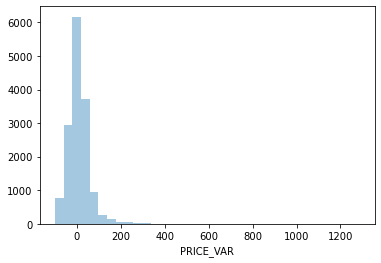

In [164]:
sns.distplot(dfn['PRICE_VAR'], kde=False, bins=35)

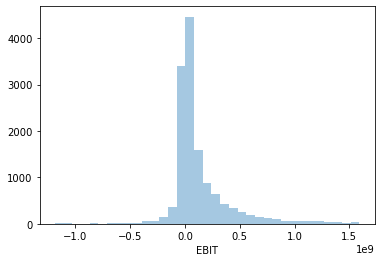

In [99]:
sns.distplot(dfn['EBIT'], kde=False, bins=35)

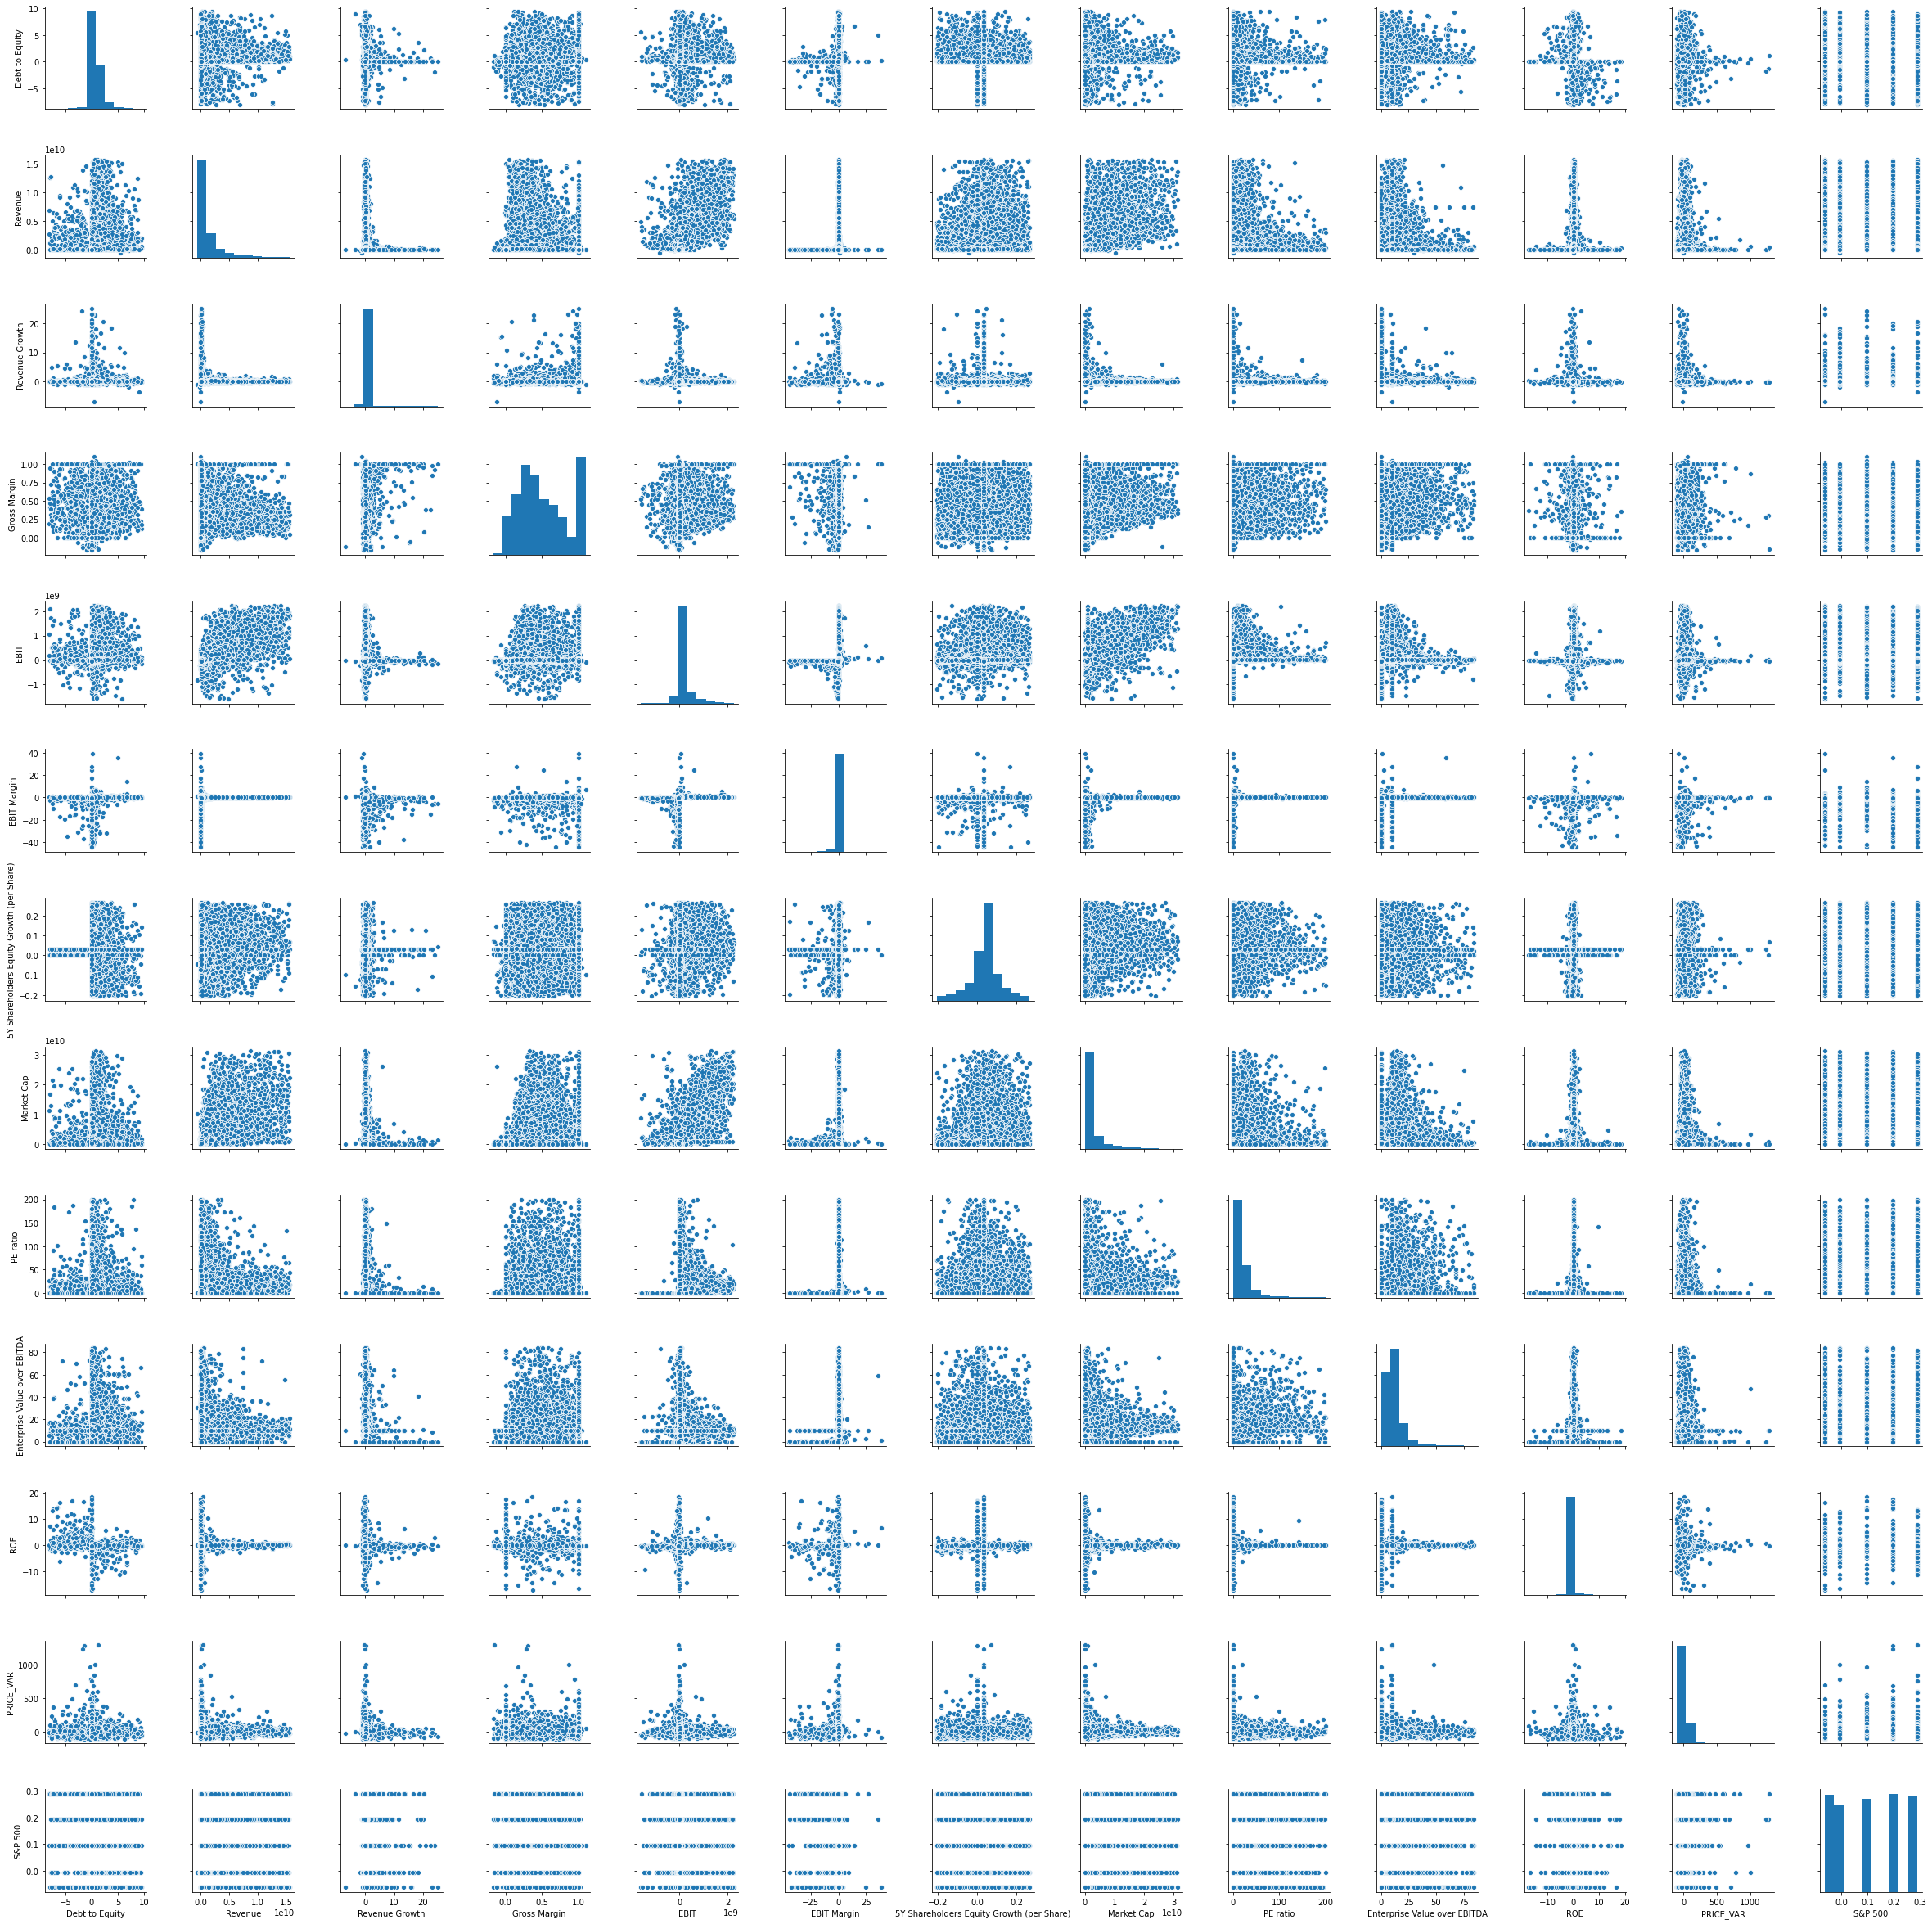

In [166]:
sns.pairplot(dfn)

In [29]:
from scipy import stats
a = np.arange(1,19826)
z = np.abs(stats.zscore(dfn))
dfz = pd.DataFrame(z, a, dfn.columns,)
print(dfz)

       Debt to Equity   Revenue  Revenue Growth  Gross Margin      EBIT  \
1            0.002125  3.603031        0.011738      0.008661  5.756566   
2            0.035568  0.054568        0.007772      0.264536  0.153788   
3            0.057789  4.843886        0.011452      0.313070  0.840282   
4            0.123478  1.073363        0.011494      0.221420  0.038014   
5            0.029376  0.679130        0.011486      0.143766  0.957225   
...               ...       ...             ...           ...       ...   
19821        0.004597  0.247842        0.011510      0.545243  0.229086   
19822        0.021490  0.247813        0.012820      0.583452  0.231213   
19823        0.001595  0.245001        0.010806      0.169049  0.223803   
19824        0.021140  0.247842        0.011510      0.545243  0.234156   
19825        0.021140  0.245097        0.011433      0.583452  0.241072   

       EBIT Margin  5Y Shareholders Equity Growth (per Share)  Market Cap  \
1         0.034797    

In [62]:
valid_zscores = dfz[dfz[dfn.columns]<3].dropna().index
print(valid_zscores)

Int64Index([    2,     4,     5,     9,    11,    13,    14,    15,    16,
               17,
            ...
            19815, 19816, 19817, 19818, 19819, 19820, 19821, 19823, 19824,
            19825],
           dtype='int64', length=18877)


In [83]:
dfz[dfz[dfn.columns]<3]

,Debt to Equity,Revenue,Revenue Growth,Gross Margin,EBIT,EBIT Margin,5Y Shareholders Equity Growth (per Share),Market Cap,PE ratio,Enterprise Value over EBITDA,ROE,PRICE_VAR,S&P 500
1,0.002125,NaN,0.011738,0.008661,NaN,0.034797,0.012763,0.130712,0.022444,0.024945,0.014302,0.013338,0.859373
2,0.035568,0.054568,0.007772,0.264536,0.153788,0.034100,0.033308,0.016451,0.051177,0.035492,0.014301,0.014231,0.859373
3,0.057789,NaN,0.011452,0.313070,0.840282,0.033997,0.101069,0.007880,0.030325,0.047110,0.014301,0.010998,0.859373
4,0.123478,1.073363,0.011494,0.221420,0.038014,0.033992,0.208776,0.016375,0.010893,0.031394,0.014305,0.012672,0.859373
5,0.029376,0.679130,0.011486,0.143766,0.957225,0.034633,0.137162,0.002854,0.022506,0.030086,0.014301,0.012113,0.859373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19821,0.004597,0.247842,0.011510,0.545243,0.229086,0.033872,0.033308,0.020422,0.044434,0.070241,0.014305,0.017841,1.420943
19822,0.021490,0.247813,0.012820,0.583452,0.231213,0.040778,NaN,0.020904,0.044434,0.070241,0.014318,0.017122,1.420943
19823,0.001595,0.245001,0.010806,0.169049,0.223803,0.034669,0.033308,0.020259,0.037219,0.035492,0.014302,0.013808,1.420943
19824,0.021140,0.247842,0.011510,0.545243,0.234156,0.033872,0.033308,0.020826,0.044434,0.070241,0.014344,0.016879,1.420943


In [31]:
#Nichts relevantes

In [32]:
#Entferne alle Spalten in denen wir keine Features haben (insgesamt haben wir 12 Features)

dfn.dropna(axis=0, thresh=13, inplace=True)

In [33]:
dfn.shape

(19825, 13)

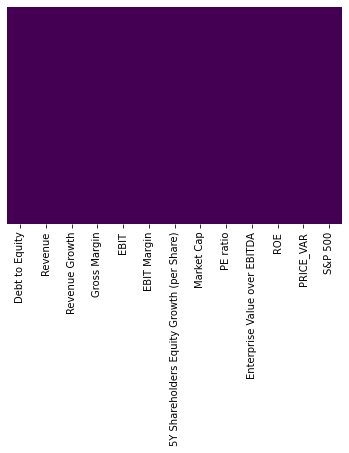

In [34]:
sns.heatmap(dfn.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [35]:
dfn.describe()

,Debt to Equity,Revenue,Revenue Growth,Gross Margin,EBIT,EBIT Margin,5Y Shareholders Equity Growth (per Share),Market Cap,PE ratio,Enterprise Value over EBITDA,ROE,PRICE_VAR,S&P 500
count,19825.000000,1.982500e+04,19825.000000,19825.000000,1.982500e+04,19825.000000,19825.000000,1.982500e+04,19825.000000,19825.000000,1.982500e+04,1.982500e+04,19825.000000
mean,0.562650,4.788438e+09,3.613297,0.483073,5.782342e+08,-7.483542,0.037598,2.932716e+10,37.900482,20.068145,1.638801e+03,2.325167e+02,0.104290
std,26.615581,1.932104e+10,313.923571,0.886001,2.540601e+09,220.938679,0.180095,1.402616e+12,852.991862,285.712606,1.145728e+05,1.813145e+04,0.129854
min,-2586.435900,-6.276160e+08,-6.872700,-74.319100,-1.871300e+10,-24242.000000,-0.887400,0.000000e+00,0.000000,0.000000,-3.477246e+04,-1.003972e+02,-0.062400
25%,0.010300,6.522600e+07,-0.012300,0.250300,-4.056000e+06,0.000000,0.000000,2.145461e+08,0.000000,5.088000,-6.470000e-02,-2.147930e+01,-0.007300
50%,0.434900,4.620340e+08,0.057800,0.454500,3.840900e+07,0.081600,0.031600,9.125362e+08,12.951600,9.927850,7.120000e-02,3.879313e+00,0.095400
75%,1.074200,2.326180e+09,0.179000,0.781500,2.655000e+08,0.211800,0.074700,3.595430e+09,23.425000,14.338900,1.454000e-01,2.944262e+01,0.194200
max,2131.512800,5.003430e+11,42138.663900,4.253100,7.290300e+10,1056.465800,6.031600,9.619200e+13,105828.712900,35296.196000,1.114114e+07,2.418601e+06,0.288800


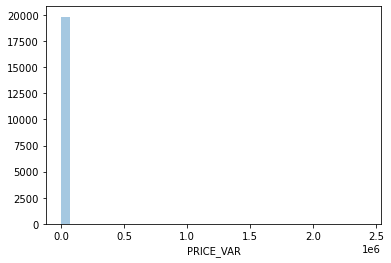

In [36]:
sns.distplot(dfn['PRICE_VAR'], kde=False, bins=35)

In [37]:
dfn['PRICE_VAR'].sort_values()

594    -1.003972e+02
1702   -9.999941e+01
4437   -9.999911e+01
1020   -9.999227e+01
2064   -9.997717e+01
            ...     
794     1.732000e+05
859     2.127000e+05
1011    2.387000e+05
3308    6.955667e+05
2068    2.418601e+06
Name: PRICE_VAR, Length: 19825, dtype: float64

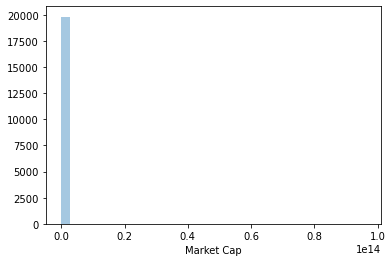

In [38]:
sns.distplot(dfn['Market Cap'], kde=False, bins=35)

In [39]:
sns.distplot(dfn['Free Cash Flow Yield'], kde=False, bins=35, )

KeyError: 'Free Cash Flow Yield'